In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from random import randint
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [35]:
data = pd.read_csv('Crystal_structure.csv')

In [36]:
data.count()

Compound             5329
A                    5329
B                    5329
In literature        5329
v(A)                 5329
v(B)                 5329
r(AXII)(Å)           5329
r(AVI)(Å)            5329
r(BVI)(Å)            5329
EN(A)                5329
EN(B)                5329
l(A-O)(Å)            5329
l(B-O)(Å)            5329
ΔENR                 5329
tG                   5329
τ                    5329
μ                    5329
Lowest distortion    5329
dtype: int64

In [37]:
data.head()

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [38]:
data = data.drop(["In literature"], axis=1)
data.columns

Index(['Compound', 'A', 'B', 'v(A)', 'v(B)', 'r(AXII)(Å)', 'r(AVI)(Å)',
       'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG',
       'τ', 'μ', 'Lowest distortion'],
      dtype='object')

In [39]:
data = data.drop(["Compound"], axis=1)
data.columns

Index(['A', 'B', 'v(A)', 'v(B)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)',
       'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ',
       'Lowest distortion'],
      dtype='object')

In [40]:
(data=='-').any()

A                    False
B                    False
v(A)                  True
v(B)                  True
r(AXII)(Å)           False
r(AVI)(Å)            False
r(BVI)(Å)            False
EN(A)                False
EN(B)                False
l(A-O)(Å)            False
l(B-O)(Å)            False
ΔENR                 False
tG                   False
τ                     True
μ                    False
Lowest distortion     True
dtype: bool

In [41]:
print(data["v(A)"].unique())
print(data["v(B)"].unique())

['0' '-' '1' '3' '2' '4' '5']
['0' '-' '5' '3' '4' '2' '1']


In [42]:
(data["v(A)"] == "-").sum(), (data["v(B)"] == "-").sum()

(1881, 1881)

In [43]:
((data["v(A)"] == "-").sum() and (data["v(B)"] == "-").sum()).sum()

1881

In [44]:
valency_a_one_hot = pd.get_dummies(data['v(A)'], prefix="v(A)=", prefix_sep="")
valency_b_one_hot = pd.get_dummies(data['v(B)'], prefix="v(B)=", prefix_sep="")
data = pd.concat([data, valency_a_one_hot, valency_b_one_hot], axis=1)

In [45]:
data = data.drop(["v(A)"], axis=1)
data = data.drop(["v(B)"], axis=1)
data.columns

Index(['A', 'B', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)',
       'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ', 'Lowest distortion',
       'v(A)=-', 'v(A)=0', 'v(A)=1', 'v(A)=2', 'v(A)=3', 'v(A)=4', 'v(A)=5',
       'v(B)=-', 'v(B)=0', 'v(B)=1', 'v(B)=2', 'v(B)=3', 'v(B)=4', 'v(B)=5'],
      dtype='object')

In [46]:
len(data["τ"].unique())

1608

In [47]:
data = data.drop(["τ"], axis=1)
data.columns

Index(['A', 'B', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)',
       'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'μ', 'Lowest distortion',
       'v(A)=-', 'v(A)=0', 'v(A)=1', 'v(A)=2', 'v(A)=3', 'v(A)=4', 'v(A)=5',
       'v(B)=-', 'v(B)=0', 'v(B)=1', 'v(B)=2', 'v(B)=3', 'v(B)=4', 'v(B)=5'],
      dtype='object')

In [48]:
(data["Lowest distortion"] == "-").sum()

53

In [49]:
a_one_hot = pd.get_dummies(data['A'], prefix="A=", prefix_sep="")
b_one_hot = pd.get_dummies(data['B'], prefix="B=", prefix_sep="")
data = pd.concat([data, a_one_hot, b_one_hot], axis=1)

In [50]:
data.columns

Index(['A', 'B', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)',
       'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR',
       ...
       'B=Ti', 'B=Tl', 'B=Tm', 'B=U', 'B=V', 'B=W', 'B=Y', 'B=Yb', 'B=Zn',
       'B=Zr'],
      dtype='object', length=173)

In [51]:
data = data.drop(["A"], axis=1)
data = data.drop(["B"], axis=1)

In [52]:
unknown_data = data[data["Lowest distortion"] == "-"]
data = data.drop(data[data["Lowest distortion"] == "-"].index)

In [53]:
unknown_data

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,...,B=Ti,B=Tl,B=Tm,B=U,B=V,B=W,B=Y,B=Yb,B=Zn,B=Zr
666,1.34,1.00,1.00,1.00,1.00,2.648078,2.318139,-3.267714,0.807280,0.714286,...,0,0,0,0,0,0,0,0,0,0
817,1.24,0.94,1.67,1.12,0.79,2.577786,3.009747,-4.609000,0.608066,1.192857,...,0,0,0,0,0,0,0,0,0,0
890,0.90,0.63,1.67,1.88,0.79,2.233563,3.009747,-3.833929,0.529754,1.192857,...,0,0,0,0,0,0,0,0,0,0
963,0.57,0.58,1.67,1.66,0.79,2.258107,3.009747,-3.652821,0.453746,1.192857,...,0,0,0,0,0,0,0,0,0,0
1034,1.88,1.67,0.63,0.79,1.88,3.300176,1.930311,-2.417679,1.142517,0.450000,...,0,0,0,0,0,0,0,0,0,0
1035,1.88,1.67,0.58,0.79,1.66,3.300176,1.960053,-2.456643,1.171369,0.414286,...,0,0,0,0,0,0,0,0,0,0
1055,1.88,1.67,0.62,0.79,1.55,3.300176,2.169994,-2.617500,1.148173,0.442857,...,0,0,0,0,0,0,0,0,0,0
1060,1.88,1.67,0.59,0.79,1.91,3.300176,2.103725,-2.310536,1.165483,0.421429,...,0,0,0,0,0,0,0,0,0,0
1182,1.08,0.99,1.67,1.22,0.79,2.550861,3.009747,-4.397929,0.571213,1.192857,...,0,0,0,0,0,0,0,0,0,0
1413,0.85,0.67,0.80,1.83,1.78,2.290644,2.147681,-1.946786,0.723177,0.571429,...,0,0,0,0,0,0,0,0,0,0


In [54]:
class_names = data["Lowest distortion"].unique()
class_names

array(['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal'],
      dtype=object)

In [55]:
data["Lowest distortion"] = data["Lowest distortion"].astype('category')
data["Lowest distortion"] = data["Lowest distortion"].cat.codes

In [56]:
len(data), len(unknown_data)

(5276, 53)

In [57]:
features = data.drop(labels=["Lowest distortion"], axis=1)
target = data["Lowest distortion"]

In [58]:
target

0       0
1       1
2       0
3       1
4       1
       ..
5324    0
5325    0
5326    1
5327    0
5328    0
Name: Lowest distortion, Length: 5276, dtype: int8

In [59]:
SEED = 0
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=SEED)

In [60]:
data

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,...,B=Ti,B=Tl,B=Tm,B=U,B=V,B=W,B=Y,B=Yb,B=Zn,B=Zr
0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,0.800000,...,0,0,0,0,0,0,0,0,0,0
1,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,0.678571,...,0,0,0,0,0,0,0,0,0,0
2,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,0.385714,...,0,0,0,0,0,0,0,0,0,0
3,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,0.371429,...,0,0,0,0,0,0,0,0,0,0
4,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,0.664286,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,0.442857,...,0,0,0,0,0,1,0,0,0,0
5325,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,0.642857,...,0,0,0,0,0,0,1,0,0,0
5326,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,0.678571,...,0,0,0,0,0,0,0,1,0,0
5327,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,0.528571,...,0,0,0,0,0,0,0,0,1,0


In [61]:
forest = RandomForestClassifier(n_estimators=1000, random_state=SEED, verbose=1)
forest = forest.fit(X_train, y_train)
forest.verbose = 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.4s finished


In [62]:
accuracy = round(forest.score(X_test, y_test) * 100, 2)

In [63]:
accuracy

79.26

In [66]:
INPUT_SHAPE = [len(X_train.columns)]
BATCH_SIZE = 32
SEED = 0
tf.random.set_seed(SEED)
np.random.seed(SEED)

In [69]:
model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(300, activation='relu', name="1st_layer", input_shape=(INPUT_SHAPE)),
              tf.keras.layers.Dropout(.4, name="1st_drop"),
              tf.keras.layers.Dense(200, activation='relu', name="2nd_layer"),
              tf.keras.layers.Dropout(.4, name="2nd_drop"),
              tf.keras.layers.Dense(100, activation='relu', name="3rd_layer"),
              tf.keras.layers.Dropout(.4, name="3rd_drop"),
              tf.keras.layers.Dense(4, activation='softmax', name="output_layer")
], name="model_1")

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["accuracy"])
plot_model(model_1, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [70]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer (Dense)           (None, 300)               51300     
                                                                 
 1st_drop (Dropout)          (None, 300)               0         
                                                                 
 2nd_layer (Dense)           (None, 200)               60200     
                                                                 
 2nd_drop (Dropout)          (None, 200)               0         
                                                                 
 3rd_layer (Dense)           (None, 100)               20100     
                                                                 
 3rd_drop (Dropout)          (None, 100)               0         
                                                                 
 output_layer (Dense)        (None, 4)                 404 

In [71]:
history_1 = model_1.fit(X_train, y_train, 
                      epochs=25, 
                      batch_size=32, 
                      validation_data=(X_test, y_test),
                      verbose=False)

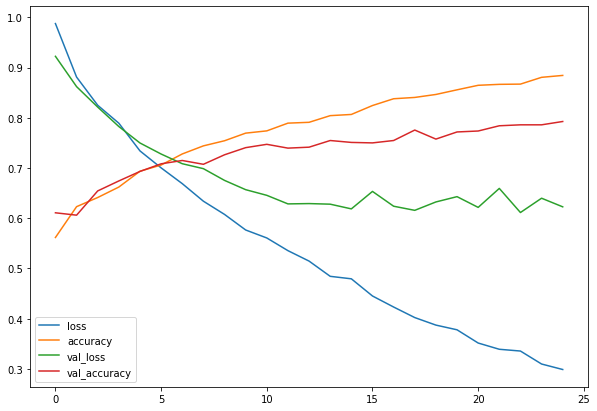

In [72]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [73]:
model_1.evaluate(X_test, y_test)

33/33 [==============================] - 0s 3ms/step - loss: 0.6227 - accuracy: 0.7926


[0.6226781010627747, 0.7926136255264282]